In [135]:
import pandas as pd
import twint
import nest_asyncio
nest_asyncio.apply()
import json
import nltk
from nltk.collocations import *
from nltk.stem import PorterStemmer
from nltk.util import ngrams

In [132]:
Final_Congress_tweets  = pd.read_csv('Final_Congress.csv')
Final_Congress_tweets.drop(['Unnamed: 0'], axis=1, inplace  = True)
Final_Congress_tweets.head()

,tweet,username,Party
0,.@repjohnlewis was gracious enough to spend ti...,repterrisewell,D
1,"At 450 pages, the Mueller Report is lengthy an...",repterrisewell,D
2,"I am so grateful to have Samuel, our Selma int...",repterrisewell,D
3,Anyone who knows me knows my dad was an instru...,repterrisewell,D
4,Please help me welcome our newest summer inter...,repterrisewell,D


In [151]:
Democrats  = pd.read_csv('Democrats_final.csv')
Democrats.drop(['Unnamed: 0'], axis=1, inplace  = True)
Democrats.head()

,tweet,username,Party
0,.@repjohnlewis was gracious enough to spend ti...,repterrisewell,D
1,"At 450 pages, the Mueller Report is lengthy an...",repterrisewell,D
2,"I am so grateful to have Samuel, our Selma int...",repterrisewell,D
3,Anyone who knows me knows my dad was an instru...,repterrisewell,D
4,Please help me welcome our newest summer inter...,repterrisewell,D


In [152]:
Democrats =  Democrats.groupby('username')['tweet'].apply(' '.join).reset_index()
Democrats.head()

,username,tweet
0,benniegthompson,"Today, we remember and reflect on the life a c..."
1,bettymccollum04,The FY20 State & Foreign Operations @AppropsDe...
2,billpascrell,Our nation's firefighters put their lives on t...
3,bobbyscott,Honored to welcome the 400 Yrs of African Amer...
4,bradsherman,Today I grilled Assistant Secretary Clarke Coo...


In [153]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
Democrats["tweet"] =Democrats["tweet"].apply(lambda x: nltk.regexp_tokenize(x,pattern))

In [154]:
with open('vocab_total_D_R.json', 'r') as f:
        vocab_total_D_R = json.load(f)

In [155]:
for i in range(len(Democrats)):
    Democrats['tweet'][i] = stem_to_final_list(Democrats['tweet'][i])

In [156]:
Democrats['tweet'][100]

['divers',
 'commun',
 'like',
 'paso',
 'enrich',
 'societi',
 'make',
 'america',
 'stronger',
 'immigr',
 'grow',
 'economi',
 'creat',
 'american',
 'job',
 'contribut',
 'extraordinari',
 'charact',
 'nation',
 'let',
 'celebr',
 'stori',
 'immigrantheritagemonth',
 'paso',
 'pride',
 'uscapitol',
 'statu',
 'ndaa',
 'author',
 'pay',
 'rais',
 'troop',
 'promot',
 'divers',
 'within',
 'deptofdefens',
 'strengthen',
 'fort',
 'resili',
 'effort',
 'promot',
 'advanc',
 'manufactur',
 'in',
 'paso',
 'support',
 'pioneer',
 'work',
 'almost',
 'hour',
 'debat',
 'ndaa',
 'ha',
 'pass',
 'hascdemocrat',
 'year',
 'bill',
 'focus',
 'improv',
 'live',
 'men',
 'women',
 'in',
 'uniform',
 'incorpor',
 'import',
 'prioriti',
 'pasoan',
 'fort',
 'thehil',
 'polici',
 'defens',
 'hous',
 'panel',
 'approv',
 'defens',
 'polici',
 'bill',
 'what',
 'day',
 'serious',
 'wa',
 'nearli',
 'hour',
 'debat',
 'vote',
 'wonder',
 'serv',
 'great',
 'proud',
 'deliv',
 'great',
 'ndaa',
 'bil

In [157]:
Democrats['Target'] = 'D'

In [173]:
Democrats

,username,tweet,Target
0,benniegthompson,"[today, rememb, reflect, life, civil, right, i...",D
1,bettymccollum04,"[state, foreign, oper, appropsdem, bill, rejec...",D
2,billpascrell,"[nation', firefight, put, live, line, us, cong...",D
3,bobbyscott,"[honor, welcom, yr, african, american, histori...",D
4,bradsherman,"[today, grill, assist, secretari, clark, coope...",D
5,chelliepingree,"[bipartisan, food, medicin, work, group, know,...",D
6,chriscoons,"[good, luck, athlet, compet, in, weekend, prou...",D
7,congboyle,"[anim, deserv, second, chanc, will, ensur, tha...",D
8,congressmanjvd,"[never, forget, hero, act, would, fulli, fund,...",D
9,congressmanraja,"[get, hear, that, answer, european, marin, his...",D


In [159]:
# Democrats.to_csv('joint_democrats.csv')

In [165]:
Republican  = pd.read_csv('Final_Rep.csv')
Republican.drop(['Unnamed: 0'], axis=1, inplace  = True)
Republican.head()

,tweet,username,Party
0,I’m so sorry to hear this news about Rod and h...,robert_aderholt,R
1,My family and I are praying for the Bramblett ...,robert_aderholt,R
2,Proudly built on American soil! ULA built #At...,robert_aderholt,R
3,Redstone Arsenal being named to the short list...,robert_aderholt,R
4,It's National Travel & Tourism Week and there ...,robert_aderholt,R


In [166]:
Republican =  Republican.groupby('username')['tweet'].apply(' '.join).reset_index()

In [167]:
Republican["tweet"] =Republican["tweet"].apply(lambda x: nltk.regexp_tokenize(x,pattern))

In [168]:
for i in range(len(Republican)):
    Republican['tweet'][i] = stem_to_final_list(Republican['tweet'][i])

In [169]:
Republican['tweet'][100]

['good',
 'see',
 'varneyco',
 'morn',
 'per',
 'request',
 'tweet',
 'come',
 'back',
 'often',
 'foxbusi',
 'late',
 'vote',
 'in',
 'hous',
 'tonight',
 'proud',
 'repres',
 'westmichigan',
 'good',
 'news',
 'economi',
 'here',
 'in',
 'westmichigan',
 'statu',
 'what',
 'great',
 'group',
 'kid',
 'thank',
 'visit',
 'capitol',
 'enjoy',
 'rest',
 'trip',
 'statu',
 'good',
 'news',
 'measur',
 'wa',
 'long',
 'overdu',
 'craigcaplan',
 'statu',
 'great',
 'way',
 'kid',
 'stay',
 'activ',
 'engag',
 'summer',
 'new',
 'opportun',
 'start',
 'june',
 'th',
 'statu',
 'wow',
 'uswnt',
 'domin',
 'perform',
 "that'",
 'make',
 'statement',
 'in',
 'open',
 'uswnt',
 'statu',
 'westmichigan',
 'rank',
 'nd',
 'in',
 'nation',
 'hire',
 'in',
 'new',
 'survey',
 'wonder',
 'see',
 'new',
 'opportun',
 'take',
 'shape',
 'whole',
 'midwest',
 'anticip',
 'best',
 'hire',
 'in',
 'year',
 'cnbc',
 'hire',
 'expect',
 'hit',
 'highest',
 'in',
 'year',
 'good',
 'new',
 'smallbusi',
 'op

In [170]:
Republican['Target'] = 'R'

In [171]:
# Republican.to_csv('joint_republican.csv')

In [172]:
df_r = pd.read_csv('joint_republican.csv')
df_r

,Unnamed: 0,username,tweet,Target
0,0,austinscottga08,"['good', 'be', 'govkemp', 'secretarysonni', 'g...",R
1,1,boblatta,"['one', 'reason', 'support', 'remov', 'titl', ...",R
2,2,cathymcmorris,"['drink', 'coffe', 'podcast', 'almost', 'everi...",R
3,3,chuckgrassley,"['met', 'commun', 'leader', 'carrol', 'abt', '...",R
4,4,conawaytx11,"['dynam', 'economi', 'in', 'texa', 'dallasnew'...",R
5,5,congbillposey,"['hous', 'pass', 'bipartisan', 'coastal', 'aci...",R
6,6,congmikesimpson,"['great', 'penc', 'advoc', 'fix', 'mainten', '...",R
7,7,congpalazzo,"['democrat', 'deni', 'humanitarian', 'relief',...",R
8,8,congressmangt,"['thank', 'come', 'in', 'great', 'meet', 'stat...",R
9,9,congressmanhice,"['part', 'two', 'special', 'freedomcaucu', 'po...",R


In [149]:
df_t = pd.read_csv('join_tweets_by_user.csv')
df_t.head()

,Unnamed: 0,username,tweet
0,0,austinscottga08,"['good', 'be', 'govkemp', 'secretarysonni', 'g..."
1,1,benniegthompson,"['today', 'rememb', 'reflect', 'life', 'civil'..."
2,2,bettymccollum04,"['state', 'foreign', 'oper', 'appropsdem', 'bi..."
3,3,billpascrell,"[""nation'"", 'firefight', 'put', 'live', 'line'..."
4,4,bobbyscott,"['honor', 'welcom', 'yr', 'african', 'american..."


In [10]:
pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
Final_Congress_tweets["tweet"] = Final_Congress_tweets['tweet'].apply(lambda x: nltk.regexp_tokenize(x,pattern))

In [14]:
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['0','1','2','3','4','5','6','7','8','9','com','https','www',
                   'pic','twitter','ly','http','html','gov','cfm','utm']
stopwords_list += list(string.ascii_lowercase)



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/flatironschool/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
#Final_Congress_tweets.to_json(r'tweets_after_stopwords.json')

In [15]:
for i in range(len(Final_Congress_tweets)):
    Final_Congress_tweets['tweet'][i] = stem_to_final_list(Final_Congress_tweets['tweet'][i]) 



In [175]:
Final_Congress_tweets

,tweet,username,Party
0,.@repjohnlewis was gracious enough to spend ti...,repterrisewell,D
1,"At 450 pages, the Mueller Report is lengthy an...",repterrisewell,D
2,"I am so grateful to have Samuel, our Selma int...",repterrisewell,D
3,Anyone who knows me knows my dad was an instru...,repterrisewell,D
4,Please help me welcome our newest summer inter...,repterrisewell,D
5,I always love meeting with talented students f...,repterrisewell,D
6,No American is above the law & for Congress to...,repterrisewell,D
7,I am thrilled to welcome our newest summer int...,repterrisewell,D
8,"Our DC summer interns — John, Diamond, Marjori...",repterrisewell,D
9,: Please join me this Friday in Pickens County...,repterrisewell,D


In [17]:
#Final_Congress_tweets.to_csv('Congress_tweets.csv', encoding='utf-8', index=False)

In [11]:
with open('vocab_total_D_R.json', 'r') as f:
        vocab_total_D_R = json.load(f)

In [139]:

def stem_to_final_list(list_of_tokens):
    porter = PorterStemmer()
    line = [porter.stem(word) for word in list_of_tokens]
    line_stem = [word for word in line if word in vocab_total_D_R]
    return line_stem
    
    
    

In [ ]:
Final_Congress_tweets['tweet'][i] = [word for word in Final_Congress_tweets['tweet'][i] if word not in stopwords_list] 



In [179]:
df1  = pd.read_csv('Congress_tweets.csv')
df1

,tweet,username,Party
0,"['repjohnlewi', 'wa', 'enough', 'spend', 'time...",repterrisewell,D
1,"['page', 'mueller', 'report', 'make', 'clear',...",repterrisewell,D
2,"['grate', 'samuel', 'selma', 'intern', 'team',...",repterrisewell,D
3,"['anyon', 'know', 'know', 'dad', 'wa', 'instru...",repterrisewell,D
4,"['pleas', 'help', 'welcom', 'newest', 'summer'...",repterrisewell,D
5,"['alway', 'love', 'meet', 'talent', 'student',...",repterrisewell,D
6,"['american', 'law', 'congress', 'carri', 'cons...",repterrisewell,D
7,"['thrill', 'welcom', 'newest', 'summer', 'inte...",repterrisewell,D
8,"['summer', 'intern', 'john', 'diamond', 'marjo...",repterrisewell,D
9,"['pleas', 'join', 'friday', 'in', 'counti', 't...",repterrisewell,D


In [180]:
df1.set_index('username', inplace = True)
df1.head()

,tweet,Party
username,,
repterrisewell,"['repjohnlewi', 'wa', 'enough', 'spend', 'time...",D
repterrisewell,"['page', 'mueller', 'report', 'make', 'clear',...",D
repterrisewell,"['grate', 'samuel', 'selma', 'intern', 'team',...",D
repterrisewell,"['anyon', 'know', 'know', 'dad', 'wa', 'instru...",D
repterrisewell,"['pleas', 'help', 'welcom', 'newest', 'summer'...",D


In [181]:
data = df1['tweet']
target = df1['Party']

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import metrics
import numpy as np
import xgboost as xgb
import os
os.environ['KMP_DUPLICATE_LIB_OK']= 'True'

In [183]:
X_train, X_test, y_train, y_test = train_test_split(data , target, test_size=0.20)

In [184]:
X_train[200]

"['grow', 'up', 'watch', 'mom', 'work', 'holiday', 'long', 'night', 'weekend', 'explan', 'wa', 'alway', 'simpl', 'nurs', 'someon', 'need', 'right', 'thank', 'nurs', 'in', 'across', 'move', 'mountain', 'give', 'peopl', 'care', 'need', 'nationalnursesweek']"

In [185]:
vectorizer = TfidfVectorizer()
tf_idf_data_train = vectorizer.fit_transform(X_train)
tf_idf_data_test = vectorizer.transform(X_test)

In [186]:
tf_idf_data_train.shape

(141024, 9554)

In [187]:
import pandas as pd
df_idf_visual = pd.DataFrame(tf_idf_data_train.todense(),columns = vectorizer.get_feature_names())


In [188]:
non_zero_cols = tf_idf_data_train.nnz / float(tf_idf_data_train.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tf_idf_data_train.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 19.250744554118448
Percentage of columns containing 0: 0.9979850591842037


In [445]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(verbose=3, n_estimators=150,max_depth=210, n_jobs=-1)
xgb_classifier = xgb.XGBClassifier()

In [190]:
nb_classifier.fit(tf_idf_data_train, y_train)
nb_train_preds = nb_classifier.predict(tf_idf_data_train)
nb_test_preds = nb_classifier.predict(tf_idf_data_test)

In [191]:
confusion = metrics.confusion_matrix(y_test, nb_test_preds, labels = ['D','R'])
confusion

array([[20547,  1852],
       [ 4905,  7952]])

[[20547  1852]
 [ 4905  7952]]


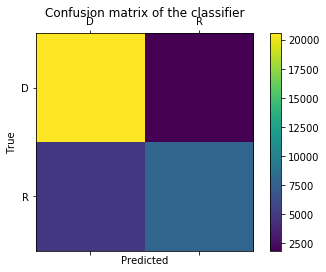

In [192]:
import matplotlib.pyplot as plt
labels = ['D', 'R']
cm = metrics.confusion_matrix(y_test, nb_test_preds, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [193]:
rf_classifier.fit(tf_idf_data_train, y_train)
rf_train_preds = rf_classifier.predict(tf_idf_data_train)
rf_test_preds = rf_classifier.predict(tf_idf_data_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   44.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    1.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.3s finished


In [194]:
nb_train_score = accuracy_score(y_train, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)
rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")
print('-'*70)
print("")
print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))



Multinomial Naive Bayes
Training Accuracy: 0.8196 		 Testing Accuracy: 0.8083

----------------------------------------------------------------------

Random Forest
Training Accuracy: 0.984 		 Testing Accuracy: 0.764


## XGboost

In [195]:
xgb_classifier.fit(tf_idf_data_train, y_train)
xgb_train_preds = xgb_classifier.predict(tf_idf_data_train)
xgb_test_preds = xgb_classifier.predict(tf_idf_data_test)
xgb_train_score = accuracy_score(y_train, xgb_train_preds)
xgb_test_score = accuracy_score(y_test, xgb_test_preds)
print('xgboost')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(xgb_train_score, xgb_test_score))

xgboost
Training Accuracy: 0.7026 		 Testing Accuracy: 0.6993


In [196]:
confusion = metrics.confusion_matrix(y_test, xgb_test_preds, labels = ['D','R'])
confusion

array([[21830,   569],
       [10033,  2824]])

# Count Vector

In [409]:
count_vectorizer = CountVectorizer(ngram_range=(1, 3),min_df  = 0.0001, max_df = 0.01)
count_data_train = count_vectorizer.fit_transform(X_train)
count_data_test = count_vectorizer.transform(X_test)

In [410]:
count_data_train.shape

(141024, 38167)

In [411]:
nb_classifier.fit(count_data_train, y_train)
nb_train_preds = nb_classifier.predict(count_data_train)
nb_test_preds = nb_classifier.predict(count_data_test)

In [412]:
confusion = metrics.confusion_matrix(y_test, nb_test_preds, labels = ['D','R'])
confusion

array([[18157,  4242],
       [ 2400, 10457]])

In [413]:
nb_train_score = accuracy_score(y_train, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)
print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")


Multinomial Naive Bayes
Training Accuracy: 0.8352 		 Testing Accuracy: 0.8116



In [415]:
rep_class_prob_sorted = nb_classifier.feature_log_prob_[0, :].argsort()
dem_class_prob_sorted = nb_classifier.feature_log_prob_[1, :].argsort()

print(np.take(count_vectorizer.get_feature_names(), rep_class_prob_sorted[:40]))
print(np.take(count_vectorizer.get_feature_names(), dem_class_prob_sorted[:40]))


['mast hous blog' 'amata' 'mcconnellpress statu' 'baton roug news'
 'ernst senat' 'ernst senat public' 'ohr' 'senateaggop' 'ohio job'
 'join potu' 'sovereignti golan height' 'rise wage' 'sovereignti golan'
 'est hous' 'est hous news' 'mchenri hous' 'southwest alabama'
 'join ingrahamangl' 'estamosunidosv' 'etc countymeet'
 'media newslett hill' 'etc countymeet instagram' 'see what week'
 'bd legisl' 'mcconnellpress' 'media newsreleas' 'truth children'
 'blue award' 'orovil' 'ornl' 'joplinglob' 'in omaha' 'joplin'
 'border end' 'fort wayn' 'fort smith' 'opportunityzon'
 'boozman senat public' 'here bit sr' 'boozman senat']
['nrdem hear' 'powel hous' 'powel hous media' 'power back in'
 'clearli commit' 'up corrupt in' 'clear trump' 'up cultureofcorrupt'
 'clear that congress' 'in transportdem' 'cleaner air children'
 'clean up washington' 'clean up corrupt' 'clean fair elect' 'clean fair'
 'in trumpbudget' 'in upstat' 'in upstat new' 'in us shelter'
 'climat climat' 'climat chao' 'climat

In [446]:
rf_classifier.fit(count_data_train, y_train)
rf_train_preds = rf_classifier.predict(count_data_train)
rf_test_preds = rf_classifier.predict(count_data_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150building tree 3 of 150


building tree 4 of 150
building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   32.1s


building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69 of 150
building tree 70

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  3.3min


building tree 124 of 150
building tree 125 of 150
building tree 126 of 150
building tree 127 of 150
building tree 128 of 150
building tree 129 of 150
building tree 130 of 150
building tree 131 of 150
building tree 132 of 150
building tree 133 of 150
building tree 134 of 150
building tree 135 of 150
building tree 136 of 150
building tree 137 of 150
building tree 138 of 150
building tree 139 of 150
building tree 140 of 150
building tree 141 of 150
building tree 142 of 150
building tree 143 of 150
building tree 144 of 150
building tree 145 of 150
building tree 146 of 150
building tree 147 of 150
building tree 148 of 150
building tree 149 of 150
building tree 150 of 150


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:   12.1s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:   15.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    3.2s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    4.2s finished


In [447]:
rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

print('-'*70)
print("")
print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))

----------------------------------------------------------------------

Random Forest
Training Accuracy: 0.8362 		 Testing Accuracy: 0.7701


In [448]:
df_count = pd.DataFrame(count_data_train.todense(),columns = count_vectorizer.get_feature_names())
feature_importance = pd.DataFrame(rf_classifier.feature_importances_, index=df_count.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importance.head(30)

,importance
foxnew,0.006307
hoosier,0.006085
secur border,0.005516
arkansa,0.004953
indiana,0.004660
ohio,0.004639
via,0.004556
alaska,0.004298
endtheshutdown,0.004185
senat public index,0.003602


## xgboost

In [433]:
xgb_classifier.fit(count_data_train, y_train)
xgb_train_preds = xgb_classifier.predict(count_data_train)
xgb_test_preds = xgb_classifier.predict(count_data_test)

In [434]:
xgb_train_score = accuracy_score(y_train, xgb_train_preds)
xgb_test_score = accuracy_score(y_test, xgb_test_preds)
print('xgboost')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(xgb_train_score, xgb_test_score))

xgboost
Training Accuracy: 0.6907 		 Testing Accuracy: 0.6874


In [435]:
confusion = metrics.confusion_matrix(y_test, xgb_test_preds, labels = ['D','R'])
confusion

array([[22194,   205],
       [10815,  2042]])

In [436]:
df_count = pd.DataFrame(count_data_train.todense(),columns = count_vectorizer.get_feature_names())
feature_importance = pd.DataFrame(xgb_classifier.feature_importances_, index=df_count.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importance.head(30)

,importance
igshid,0.015845
foxnew,0.015845
lgbtq,0.014085
senat public,0.014085
endtheshutdown,0.014085
protectourcar,0.014085
illeg,0.012324
abort,0.012324
separ,0.012324
alaska,0.010563


# Count vector with 1 Ngram

In [449]:
count_vectorizer = CountVectorizer(ngram_range=(1, 1))
count_data_train = count_vectorizer.fit_transform(X_train)
count_data_test = count_vectorizer.transform(X_test)

In [450]:
count_data_train.shape

(141024, 9554)

In [451]:
nb_classifier.fit(count_data_train, y_train)
nb_train_preds = nb_classifier.predict(count_data_train)
nb_test_preds = nb_classifier.predict(count_data_test)

In [452]:
confusion = metrics.confusion_matrix(y_test, nb_test_preds, labels = ['D','R'])
confusion

array([[18324,  4075],
       [ 2925,  9932]])

In [453]:
nb_train_score = accuracy_score(y_train, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)
print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")

Multinomial Naive Bayes
Training Accuracy: 0.8131 		 Testing Accuracy: 0.8015



In [464]:
rep_class_prob_sorted = nb_classifier.feature_log_prob_[0, :].argsort()
dem_class_prob_sorted = nb_classifier.feature_log_prob_[1, :].argsort()

print(np.take(count_vectorizer.get_feature_names(), rep_class_prob_sorted[:100]))
print(np.take(count_vectorizer.get_feature_names(), dem_class_prob_sorted[:100]))

['senyoung' 'wickerreport' 'grandforksherald' 'greatsmokynp'
 'greennewdisast' 'asahutchinson' 'griffith' 'ryder' 'rxsummit' 'rulesrep'
 'hagedorn' 'asignaci' 'halrog' 'arkansasonlin' 'arkansas' 'hartzler'
 'haut' 'ronjohnson' 'heraldtribun' 'hfac' 'hice' 'hoeven' 'holdtothecap'
 'hanniti' 'wichitast' 'wichita' 'wibc' 'austinscott' 'freemajd'
 'securethebord' 'secureourbord' 'secondamend' 'searci' 'gainesvil'
 'gaport' 'scti' 'geneviev' 'schoolchoiceweek' 'schoolchoic' 'gleason'
 'gojackswbb' 'sbalist' 'gopheat' 'wheresron' 'gophous' 'goptaxcut'
 'savannah' 'sassywithmassi' 'sascmajor' 'govkemp' 'homelandgop' 'wkrg'
 'hoosierhighlight' 'hoosierhuddl' 'repannwagner' 'americafirst'
 'kamalmaz' 'katyisd' 'amata' 'wreckem' 'kennedyn' 'kenosha' 'kenoshanew'
 'kentuckian' 'kentuckynewera' 'kilmead' 'koanewsradio' 'kodiak' 'alpolit'
 'wtaw' 'ksag' 'ksleg' 'kustoff' 'kymx' 'lagoon' 'lakeeri'
 'lakeofactcheck' 'journalgazett' 'freedomwork' 'joplinglob' 'johnros'
 'reunida' 'housebudgetgop' 'hou

In [455]:
rf_classifier.fit(count_data_train, y_train)
rf_train_preds = rf_classifier.predict(count_data_train)
rf_test_preds = rf_classifier.predict(count_data_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 150building tree 2 of 150

building tree 3 of 150building tree 4 of 150

building tree 5 of 150
building tree 6 of 150
building tree 7 of 150
building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150
building tree 12 of 150
building tree 13 of 150
building tree 14 of 150
building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150
building tree 20 of 150
building tree 21 of 150
building tree 22 of 150
building tree 23 of 150
building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.3min


building tree 28 of 150
building tree 29 of 150
building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150
building tree 35 of 150
building tree 36 of 150
building tree 37 of 150
building tree 38 of 150
building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
building tree 43 of 150
building tree 44 of 150
building tree 45 of 150
building tree 46 of 150
building tree 47 of 150
building tree 48 of 150
building tree 49 of 150
building tree 50 of 150
building tree 51 of 150
building tree 52 of 150
building tree 53 of 150
building tree 54 of 150
building tree 55 of 150
building tree 56 of 150
building tree 57 of 150
building tree 58 of 150
building tree 59 of 150
building tree 60 of 150
building tree 61 of 150
building tree 62 of 150
building tree 63 of 150
building tree 64 of 150
building tree 65 of 150
building tree 66 of 150
building tree 67 of 150
building tree 68 of 150
building tree 69

[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.9min


building tree 124 of 150
building tree 125 of 150
building tree 126 of 150
building tree 127 of 150
building tree 128 of 150
building tree 129 of 150
building tree 130 of 150
building tree 131 of 150
building tree 132 of 150
building tree 133 of 150
building tree 134 of 150
building tree 135 of 150
building tree 136 of 150
building tree 137 of 150
building tree 138 of 150
building tree 139 of 150
building tree 140 of 150
building tree 141 of 150
building tree 142 of 150
building tree 143 of 150
building tree 144 of 150
building tree 145 of 150
building tree 146 of 150
building tree 147 of 150
building tree 148 of 150
building tree 149 of 150
building tree 150 of 150


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.3min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    1.5s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    7.5s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    9.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    2.6s finished


In [457]:
rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

print('-'*70)
print("")
print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))

----------------------------------------------------------------------

Random Forest
Training Accuracy: 0.9725 		 Testing Accuracy: 0.7957


In [458]:
confusion = metrics.confusion_matrix(y_test, rf_test_preds, labels = ['D','R'])
confusion

array([[21059,  1340],
       [ 5864,  6993]])

In [459]:
df_count = pd.DataFrame(count_data_train.todense(),columns = count_vectorizer.get_feature_names())
feature_importance = pd.DataFrame(rf_classifier.feature_importances_, index=df_count.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importance.head(30)

,importance
trump,0.010424
democrat,0.006111
bit,0.005575
great,0.005389
border,0.005109
trumpshutdown,0.004664
in,0.004573
forthepeopl,0.004568
climat,0.004440
potu,0.004432


## Xgboost

In [460]:
xgb_classifier.fit(count_data_train, y_train)
xgb_train_preds = xgb_classifier.predict(count_data_train)
xgb_test_preds = xgb_classifier.predict(count_data_test)

In [461]:
xgb_train_score = accuracy_score(y_train, xgb_train_preds)
xgb_test_score = accuracy_score(y_test, xgb_test_preds)
print('xgboost')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(xgb_train_score, xgb_test_score))

xgboost
Training Accuracy: 0.7057 		 Testing Accuracy: 0.7028


In [462]:
confusion = metrics.confusion_matrix(y_test, xgb_test_preds, labels = ['D','R'])
confusion

array([[21637,   762],
       [ 9717,  3140]])

In [463]:
df_count = pd.DataFrame(count_data_train.todense(),columns = count_vectorizer.get_feature_names())
feature_importance = pd.DataFrame(xgb_classifier.feature_importances_, index=df_count.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importance.head(25)

,importance
democrat,0.031797
trump,0.023847
trumpshutdown,0.023847
forthepeopl,0.022258
border,0.019078
climat,0.017488
politician,0.017488
foxnew,0.015898
potu,0.015898
bit,0.012719
